In [1]:

import os.path as osp
shared_folder = osp.abspath(osp.join(os.pardir, 'share')); assert osp.exists(shared_folder)
import sys
if shared_folder not in sys.path: sys.path.insert(1, shared_folder)
from notebook_utils import NotebookUtilities
nu = NotebookUtilities(
    data_folder_path=osp.abspath(osp.join(os.pardir, 'data')),
    saves_folder_path=osp.abspath(osp.join(os.pardir, 'saves'))
)

# Import needed libraries
%pprint
sys.path.insert(1, osp.join(os.pardir, 'py'))
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
from matplotlib.patches import Rectangle
import numpy as np

Pretty printing has been turned OFF


In [2]:

generations_df = nu.load_object('generations_df')
turning_numbers_df = nu.load_object('turning_numbers_df')
turnings_df = nu.load_object('turnings_df')


# Prime Ministers of the United Kingdom

In [3]:

if nu.pickle_exists('uk_prime_ministers_df'):
    uk_prime_ministers_df = nu.load_object('uk_prime_ministers_df')
else:
    tables_url = 'https://en.wikipedia.org/wiki/List_of_prime_ministers_of_the_United_Kingdom'
    df_list = nu.get_wiki_tables(tables_url)

    uk_prime_ministers_df = df_list[0].copy()
    uk_prime_ministers_df.columns = [cn_tuple[0] if (cn_tuple[0] == cn_tuple[1]) else ' '.join(list(cn_tuple)) for cn_tuple in uk_prime_ministers_df.columns]
    uk_prime_ministers_df['leader_name'] = uk_prime_ministers_df['Prime minister Office (Lifespan)'].map(lambda x: str(x).split('[')[0].strip())
    def f(x):
        
        return [i for i in re.split(r'\D+', str(x).split('(')[-1].strip(), 0) if (str(i) != '')][0]
    uk_prime_ministers_df['year_of_birth'] = uk_prime_ministers_df['Prime minister Office (Lifespan)'].map(f)
    def f(x):
        years_list = [i for i in re.split(r'\D+', str(x).split('(')[-1].strip(), 0) if (str(i) != '')]
        if len(years_list) == 2: return years_list[1]
        else: return np.nan
    uk_prime_ministers_df['year_of_death'] = uk_prime_ministers_df['Prime minister Office (Lifespan)'].map(f)
    uk_prime_ministers_df['office_rank'] = uk_prime_ministers_df.index.map(lambda x: x+1)
    uk_prime_ministers_df['year_term_begin'] = uk_prime_ministers_df['Term of office Start'].map(lambda x: int(str(x).split(' ')[-1].strip()))
    for cn in ['year_of_birth', 'year_of_death', 'office_rank', 'year_term_begin']:
        uk_prime_ministers_df[cn] = pd.to_numeric(uk_prime_ministers_df[cn], errors='coerce')
    for row_index, row_series in uk_prime_ministers_df.iterrows():
        year_of_birth = row_series.year_of_birth
        mask_series = (generations_df.birth_year_begin <= year_of_birth) & (generations_df.birth_year_end >= year_of_birth)
        generation_name = generations_df[mask_series].index.tolist()[-1]
        uk_prime_ministers_df.loc[row_index, 'generation_name'] = generation_name
        turnings_archetype = generations_df[mask_series].turnings_archetype.tolist()[-1]
        uk_prime_ministers_df.loc[row_index, 'turnings_archetype'] = turnings_archetype
    for row_index, row_series in uk_prime_ministers_df.iterrows():
        year_term_begin = row_series.year_term_begin
        mask_series = (turnings_df.turning_year_begin <= year_term_begin) & (turnings_df.turning_year_end >= year_term_begin)

        # Get turning number
        turning_number = turnings_df[mask_series].turning_number.tolist()[-1]
        uk_prime_ministers_df.loc[row_index, 'turning_number'] = turning_number

        # Get turning name
        turning_name = turnings_df[mask_series].index.tolist()[-1]
        uk_prime_ministers_df.loc[row_index, 'turning_name'] = turning_name

        # Get turning type
        mask_series = (turning_numbers_df.index == turning_number)
        turning_type = turning_numbers_df[mask_series].turning_type.tolist()[-1]
        uk_prime_ministers_df.loc[row_index, 'turning_type'] = turning_type

    uk_prime_ministers_df.turning_number = uk_prime_ministers_df.turning_number.astype(int)
    uk_prime_ministers_df['age_at_inauguration'] = (uk_prime_ministers_df.year_term_begin - uk_prime_ministers_df.year_of_birth)
    uk_prime_ministers_df = uk_prime_ministers_df.set_index('leader_name')
    
    nu.store_objects(uk_prime_ministers_df=uk_prime_ministers_df)

In [4]:

uk_prime_ministers_df.sample(5).T

leader_name,George Grenville,Arthur Wellesley,H. H. Asquith,Bonar Law,William Lamb
Portrait,NaN,NaN,NaN,NaN,NaN
Portrait Portrait.1,NaN,NaN,NaN,NaN,NaN
Prime minister Office (Lifespan),George Grenville[34] MP for Buckingham (1712–1...,Arthur Wellesley[50] 1st Duke of Wellington (1...,H. H. Asquith[73] MP for East Fife (1852–1928),Bonar Law[75] MP for Glasgow Central (1858–1923),William Lamb[55] 2nd Viscount Melbourne (1779–...
Term of office Start,16 April 1763,22 January 1828,8 April 1908,23 October 1922,18 April 1835
Term of office End,10 July 1765,16 November 1830,5 December 1916,20 May 1923,30 August 1841
Term of office Duration,"2 years, 86 days","2 years, 299 days","8 years, 243 days",210 days,"6 years, 135 days"
Mandate[a],—,(1830),(Dec.1910),1922,1837
Ministerial offices held as prime minister,Chancellor of the ExchequerFirst Lord of the T...,First Lord of the TreasuryLeader of the House ...,First Lord of the TreasuryLeader of the House ...,First Lord of the TreasuryLeader of the House ...,First Lord of the TreasuryLeader of the House ...
Party,Whig (Grenvillite),Tory,Liberal,Conservative (Scot.U.),Whig
Government,Grenville (mainly Whig),Wellington–​Peel,Asquith III,Law,Melbourne II


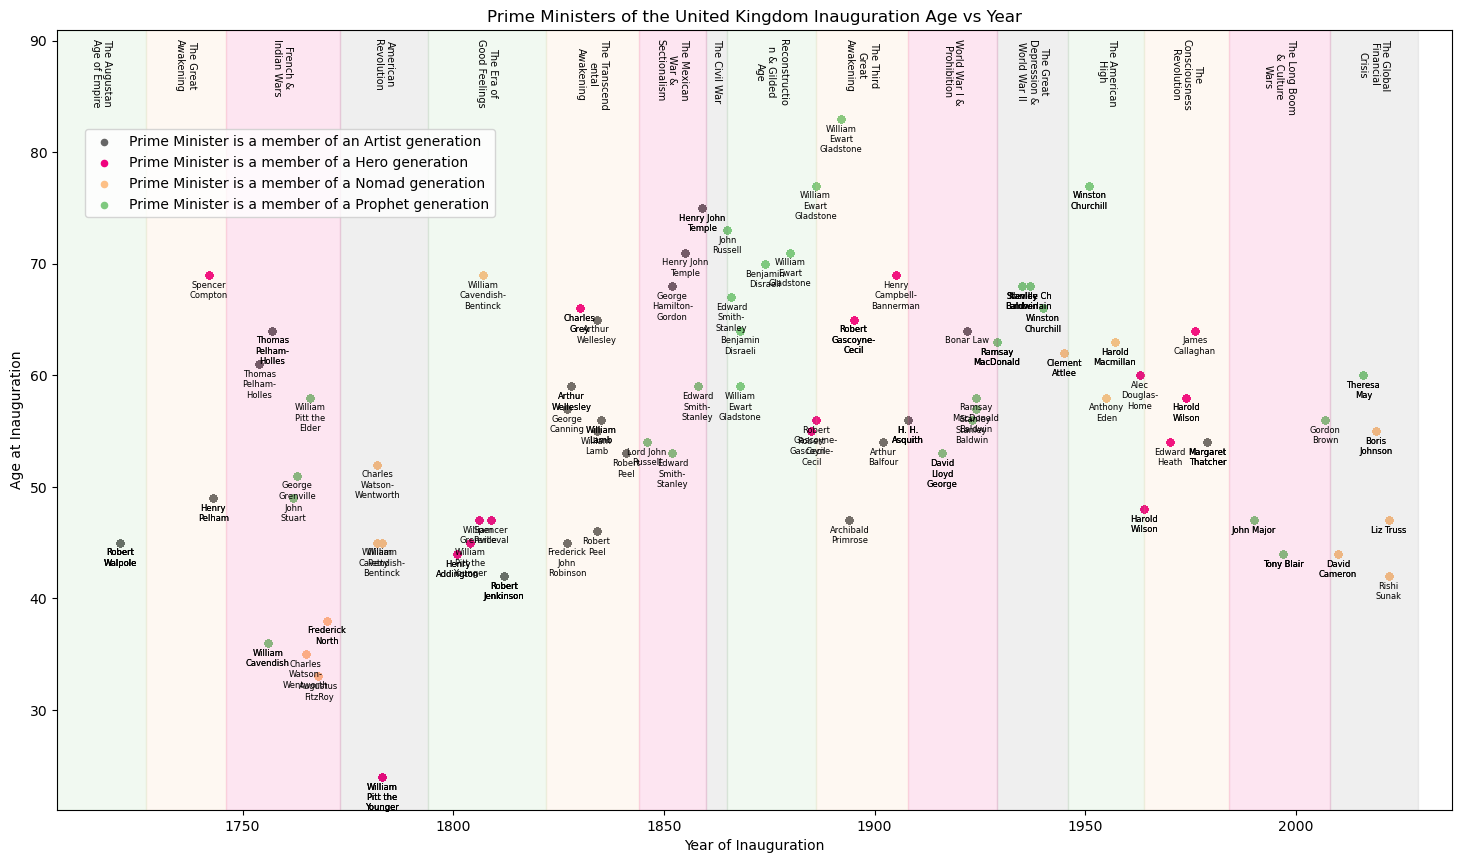

In [5]:

df1 = turnings_df.reset_index()
df2 = generations_df.reset_index()
on_list = list(set(df1.columns).intersection(set(df2.columns)))
df3 = df1.merge(df2, on=on_list)
nu.plot_inauguration_age(
    inauguration_df=uk_prime_ministers_df, groupby_column_name='turnings_archetype', xname='year_term_begin', leader_designation='Prime Minister',
    label_infix='is a member of', label_suffix='generation', info_df=df3,
    title_prefix='Prime Ministers of the United Kingdom'
)

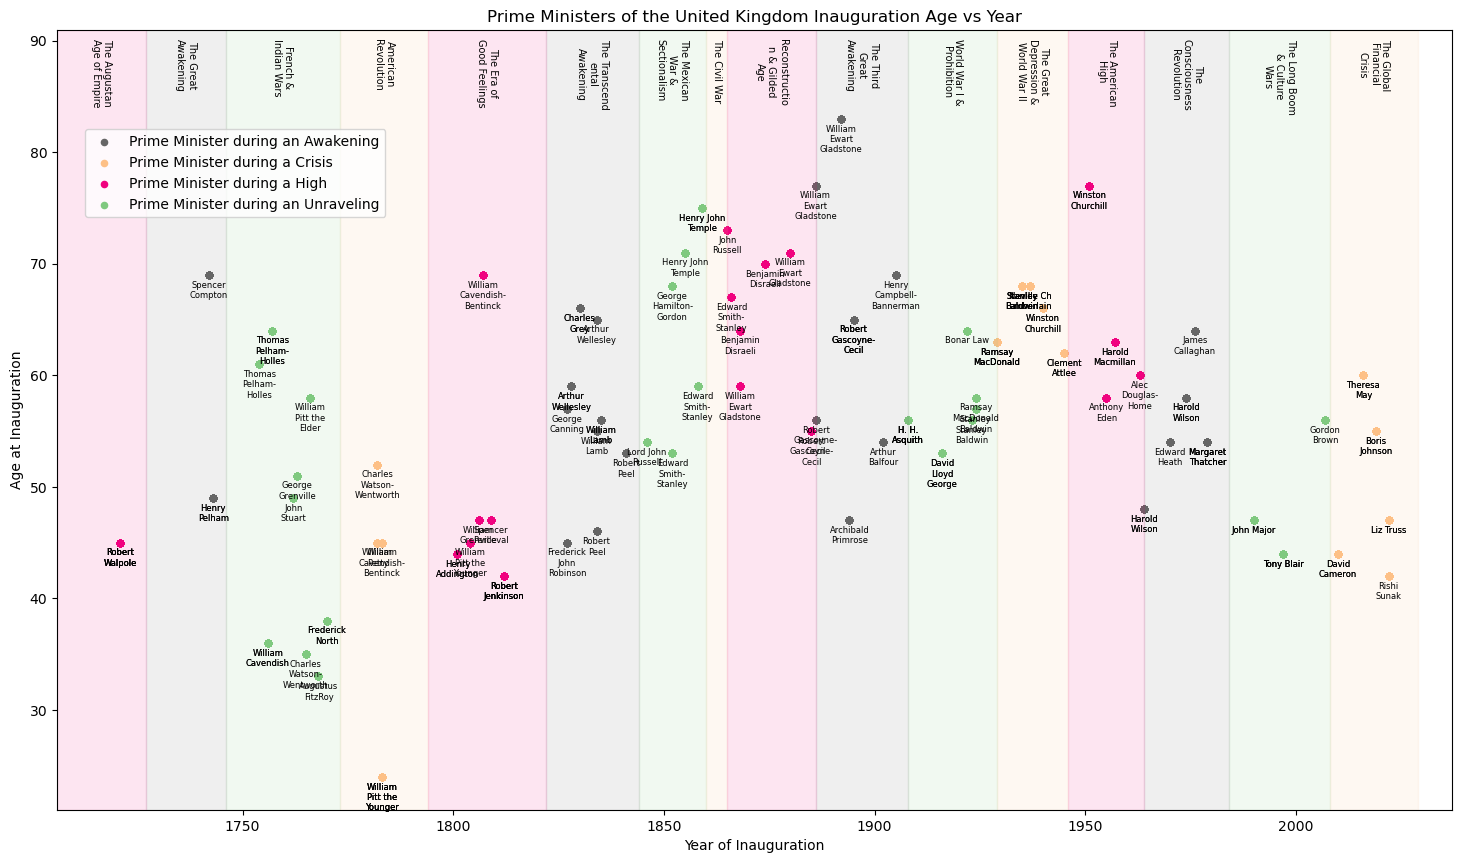

In [6]:

df1 = turnings_df.reset_index()
df2 = turning_numbers_df.reset_index().rename(columns={'index': 'turning_number'})
on_list = list(set(df1.columns).intersection(set(df2.columns)))
df3 = df1.merge(df2, on=on_list)
df4 = generations_df.reset_index()
on_list = list(set(df3.columns).intersection(set(df4.columns)))
df5 = df3.merge(df4, on=on_list)
nu.plot_inauguration_age(
    inauguration_df=uk_prime_ministers_df, groupby_column_name='turning_type', xname='year_term_begin', leader_designation='Prime Minister',
    label_infix='during', label_suffix='', info_df=df5,
    title_prefix='Prime Ministers of the United Kingdom'
)

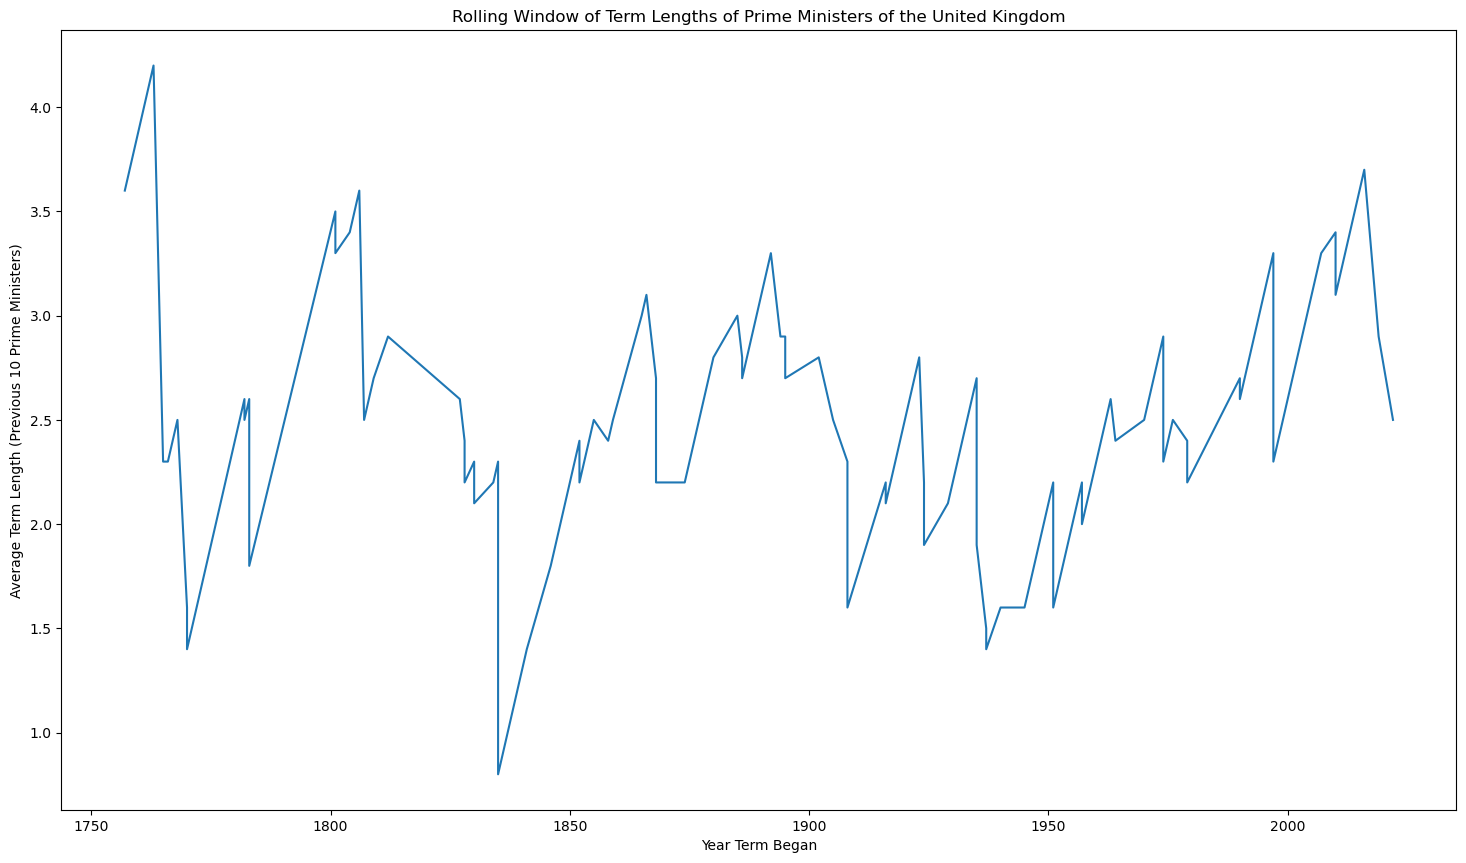

In [10]:

# Calculate the diff of the year_term_begin column
uk_prime_ministers_df['year_term_begin_diff'] = uk_prime_ministers_df.year_term_begin.diff()

# Plot a rolling window of the year_term_begin_diff column
figwidth = 18
fig, ax = plt.subplots(figsize=(figwidth, figwidth/nu.twitter_aspect_ratio))
ax.plot(uk_prime_ministers_df.year_term_begin, uk_prime_ministers_df.year_term_begin_diff.rolling(window=10).mean())

# Set the title and labels
ax.set_title('Rolling Window of Term Lengths of Prime Ministers of the United Kingdom')
ax.set_xlabel('Year Term Began')
ax.set_ylabel('Average Term Length (Previous 10 Prime Ministers)')

# Make a comment about the 1500s
annotation_str = '"May his days be few; may another take his position"\nPsalm 109:8'
ax.annotate(text=annotation_str, xy=(1500, 18), xytext=(1500, 18), verticalalignment='top',
            horizontalalignment='left', fontsize=10);